In [2]:
# 필요한 패키지와 데이터파일 불러오기 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
시군구상권코드=pd.read_csv("c:/data/project/team/raw/시군구상권코드.csv",encoding='cp949')
집객시설=pd.read_csv("c:/data/project/team/raw/집객시설.csv",encoding='cp949') 
유동인구=pd.read_csv("c:/data/project/team/raw/유동인구.csv",encoding='cp949') 
직장인구=pd.read_csv("c:/data/project/team/raw/직장인구.csv",encoding='cp949') 
편의점매출=pd.read_csv("c:/data/project/team/raw/편의점매출.csv",encoding='cp949') 
편의점수=pd.read_csv("c:/data/project/team/raw/편의점수.csv",encoding='cp949')
상주인구=pd.read_csv("c:/data/project/team/raw/상주인구.csv",encoding='cp949')
술집=pd.read_csv("c:/data/project/team/raw/간이술집.csv",encoding='cp949')

In [3]:
# 연도별 합계로 그룹화하기
개폐업=편의점수.groupby(['기준년코드'],as_index=False).sum()
개폐업율=편의점수.groupby(['기준년코드'],as_index=False).mean()

## 15년에서 19년사이 서울시 편의점의 개업/폐업 점포수 그리고 비율을 시각화
- 서울시 기준 2016년 이후 개업 편의점은 감소하는 반면 폐업 편의점은 증가하는 것을 확인 할 수 있습니다.
- 위를 통하여 서울시 편의점사업을 하는 것이 다소 위험하다고 판단 할 수 있습니다.

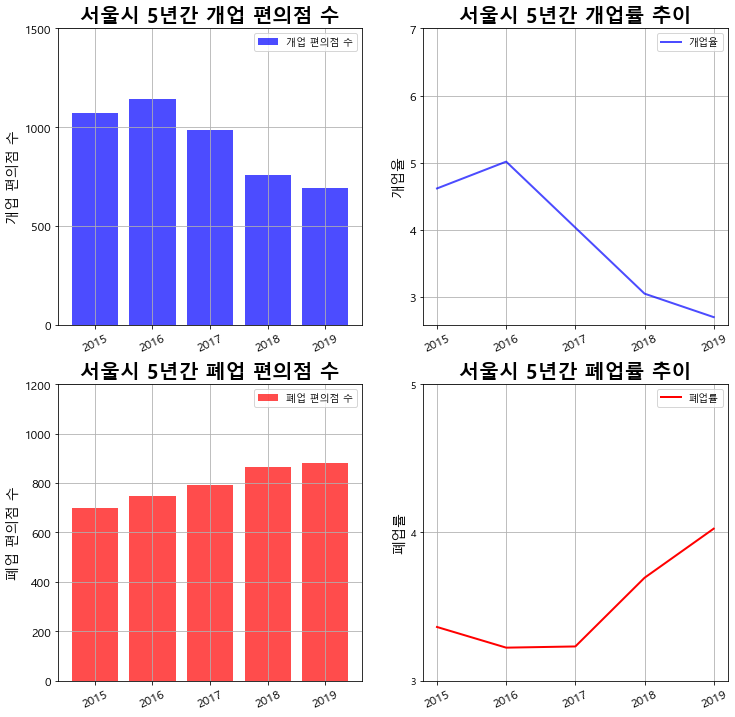

In [4]:
# 15-19 개업점포수와 개업률 시각화
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.bar(range(2015, 2020), 개폐업['개업점포수'], color='b', linewidth=2, alpha=0.7)
plt.title("서울시 5년간 개업 편의점 수", size=20, weight="bold")
plt.ylabel('개업 편의점 수', size=14)
plt.xticks(fontsize=12, rotation=25)
plt.yticks(range(0, 2000, 500), fontsize=12)
plt.legend(['개업 편의점 수'])
plt.grid()

plt.subplot(2,2,2)
plt.plot(range(2015, 2020),개폐업율['개업율'], color='b', linewidth=2, alpha=0.7)
plt.title("서울시 5년간 개업률 추이", size=20, weight="bold")
plt.ylabel('개업율', size=14)
plt.xticks(range(2015, 2020), fontsize=12, rotation=25)
plt.yticks(range(3,8,1), fontsize=12)
plt.legend(['개업율'])
plt.grid()

# 15-19 폐업점포수와 폐업률 시각화
plt.subplot(2,2,3)
plt.bar(range(2015, 2020), 개폐업['폐업점포수'], color='r', linewidth=2, alpha=0.7)
plt.title("서울시 5년간 폐업 편의점 수", size=20, weight="bold")
plt.ylabel('폐업 편의점 수', size=14)
plt.xticks(fontsize=12, rotation=25)
plt.yticks(range(0, 1400, 200), fontsize=12)
plt.legend(['폐업 편의점 수'])
plt.grid()

plt.subplot(2,2,4)
plt.plot(range(2015, 2020),개폐업율['폐업률'], color='r', linewidth=2)
plt.title("서울시 5년간 폐업률 추이", size=20, weight="bold")
plt.ylabel('폐업률', size=14)
plt.xticks(range(2015, 2020), fontsize=12, rotation=25)
plt.yticks(range(3,6,1), fontsize=10)
plt.legend(['폐업률'])
plt.grid()
plt.show()

In [5]:
# 분기별 폐업점포수
개폐업수=편의점수.groupby(['기준년코드','기준분기코드'],as_index=False).sum()
폐업수=개폐업수.loc[:,['기준년코드','기준분기코드','폐업점포수']]
폐업수['기준년코드'] = 폐업수['기준년코드'].astype('object')
폐업수['기준분기코드'] = 폐업수['기준분기코드'].astype('object')
폐업수['기준년도코드']=폐업수['기준년코드'].map(str)+"년"+폐업수['기준분기코드'].map(str)+"분기"
폐업수=폐업수.drop(['기준년코드','기준분기코드'],axis='columns')


In [6]:
# 분기별 개업점포수
개업수=개폐업수.loc[:,['기준년코드','기준분기코드','개업점포수']]
개업수['기준년코드'] = 개업수['기준년코드'].astype('object')
개업수['기준분기코드'] = 개업수['기준분기코드'].astype('object')
개업수['기준년도코드']=개업수['기준년코드'].map(str)+"년"+개업수['기준분기코드'].map(str)+"분기"
개업수=개업수.drop(['기준년코드','기준분기코드'],axis='columns')


## 연도별이 아닌 분기별로 세분화하여 구체적으로 개폐업에 대한 인사이트를 얻었습니다.
- 2015년 1분기를 기점으로 편의점 사업이 활발하게 이루어진 것을 알 수 있었습니다.
- 2017년 3분까지 대체로 연도별 개업편의점수와 폐업편의점수가 정비례관계였지만 이후에는 개업편의점수와 상관없이 폐업편의점수가 증가했다는 다른 양상을 알 수 있었습니다.

[]

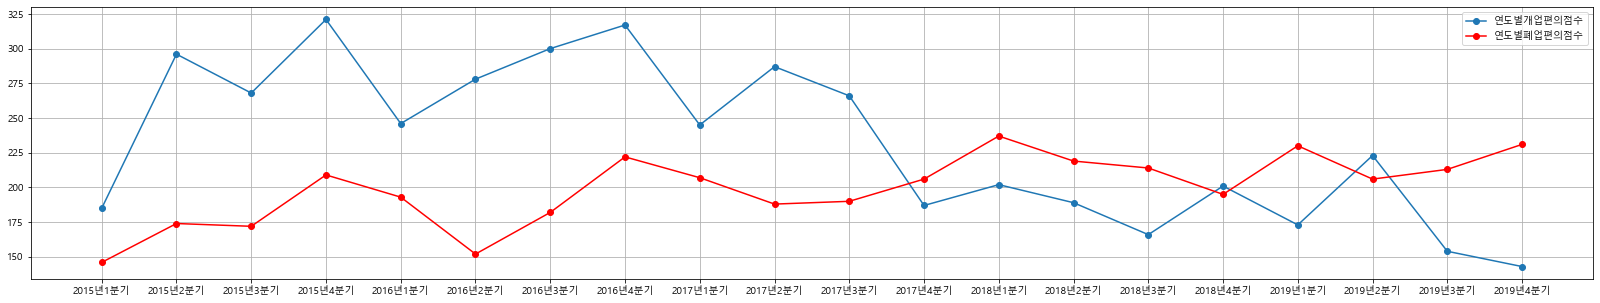

In [7]:
# 분기별 개폐업 점포수 시각화
%matplotlib inline
fig=plt.figure(figsize=(28,5))
plt.rcParams['axes.grid'] = True
ax=fig.add_subplot()
ax.plot(개업수['기준년도코드'],개업수['개업점포수'], marker='o',label='연도별개업편의점수')
ax.plot(폐업수['기준년도코드'],폐업수['폐업점포수'], color='r', marker='o',label='연도별폐업편의점수')
ax.legend()
ax.plot()

# 편의점 매출 EDA 

In [8]:
# 각 데이터셋에 결측치를 확인해주기 위한 missingno 라이브러리 
import missingno as msno
# 결측치 함수생성
def missing(x):
    %matplotlib inline
    msno.matrix(x,figsize=(9,3))


In [9]:
#  편의점 매출 자료 추출
#  당월매출금액 / 점포수 = 개별 점포 매출금액 
편의점매출=편의점매출.loc[:,['상권코드','점포별월매출금액']]
편의점매출=편의점매출.groupby(['상권코드'],as_index=False).mean()
편의점매출.head(5)
 

,상권코드,점포별월매출금액
0,1000001,2.068619e+08
1,1000002,2.055070e+08
2,1000003,1.488270e+08
3,1000004,2.887345e+08
4,1000005,7.954911e+07


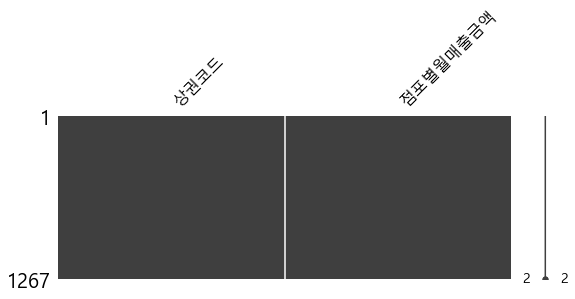

In [10]:
# 편의점 매출 결측치 확인 
missing(편의점매출)

##  편의점 수 EDA 

In [11]:
#편의점수
편의점수1=편의점수.loc[:,['상권코드','일반편의점점포수','프랜차이즈점포수','총편의점점포수']]
편의점수2=편의점수.loc[:,['상권코드','개업점포수','폐업점포수']]
편의점수1=편의점수1.groupby(['상권코드'],as_index=False).mean()
편의점수2=편의점수2.groupby(['상권코드'],as_index=False).sum()
편의점수=pd.merge(편의점수1,편의점수2)
편의점수['생존률']=편의점수['총편의점점포수']/(편의점수['총편의점점포수']+편의점수['폐업점포수'])
# 편의점수.to_csv("c:/data/project/team/revised_clf/편의점수.csv",encoding='cp949',index=False)

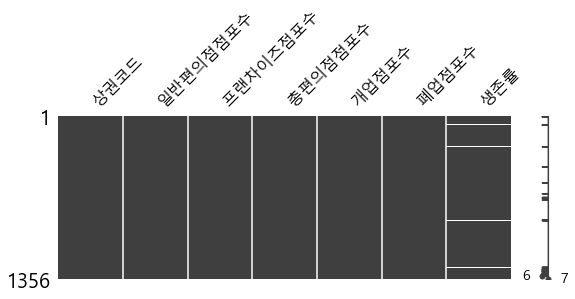

In [12]:
# 편의점 매출 결측치 확인 
missing(편의점수)

## 생존률 시각화 (폐업점포수가 없으면 생존률이 100%)
- 생존률이 1(100%) 인 도로명들이 다수 존재
- 생존률이 1(100%) 인 경우 관광지( 독립변수와 상관없이 매출액이 높아 생존률이 높다 ) 이상치라고 가정하고 제거 

<AxesSubplot:xlabel='생존률', ylabel='Density'>

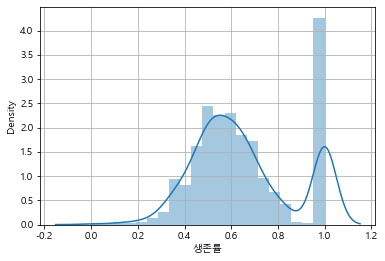

In [13]:
# 종속변수 "생존률" 파악
sns.distplot(편의점수["생존률"])

In [14]:
# 결측치 파악 == 처음부터 해당상권에 편의점이 없었던 경우
편의점수[편의점수["생존률"].isnull()].head()
# 결측치값을 0으로 변환 
편의점수=편의점수.fillna(0)

In [15]:
# 생존률이 0 인경우 (과거 해당상권에 편의점이 있었지만 아예 사라진 경우) 제거
편의점수=편의점수[편의점수["생존률"]!=0]


In [16]:
# 생존률이 0인 데이터 제거 확인
편의점수[편의점수["생존률"]==0]

,상권코드,일반편의점점포수,프랜차이즈점포수,총편의점점포수,개업점포수,폐업점포수,생존률


In [17]:
# 생존률이 1인경우 ( 폐업 편의점이 없는 경우 ) 
편의점수=편의점수[편의점수["생존률"]!=1]
편의점수[편의점수["생존률"]==1]


,상권코드,일반편의점점포수,프랜차이즈점포수,총편의점점포수,개업점포수,폐업점포수,생존률


<AxesSubplot:xlabel='생존률', ylabel='Density'>

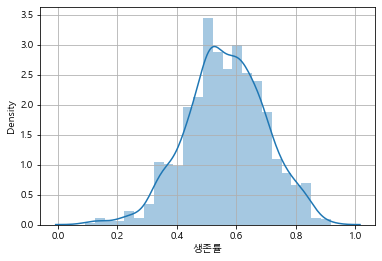

In [18]:
# 이상치와 결측치를 제거 후 종속변수인 "생존률" 분포 파악
sns.distplot(편의점수["생존률"])

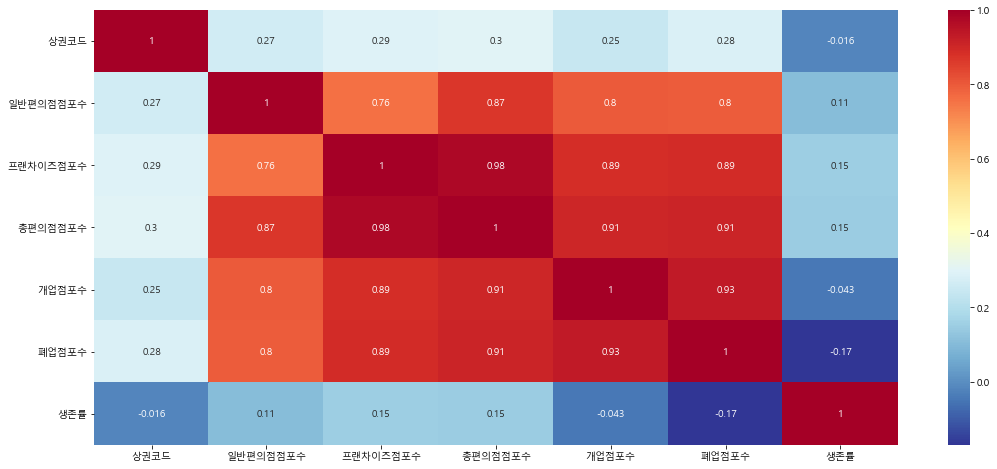

In [19]:
# 히트맵으로 편의점수의 데이터에 상관관계 파악 
# 프렌차이즈점포수-일반편의점점포수-총편의점수 // 폐업률-폐업률1-폐업점포수 다중공선성 가능성이 크다고 파악 
plt.figure(figsize=(18,8))
corrmat=sns.heatmap(편의점수.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

In [20]:
# 다중공선성이 높은 총편의점수를 제외하고 독립변수를 선정
편의점수=편의점수.loc[:,['상권코드','총편의점점포수','일반편의점점포수','프랜차이즈점포수','생존률']]


## 직장인구

In [21]:
#직장인구
직장인구=직장인구.loc[:,['상권코드','총직장인구수']]
직장인구=직장인구.groupby(['상권코드'],as_index=False).mean()
직장인구.head(5)

,상권코드,총직장인구수
0,1000001,782.75
1,1000002,345.75
2,1000003,1660.70
3,1000004,25.10
4,1000005,404.55


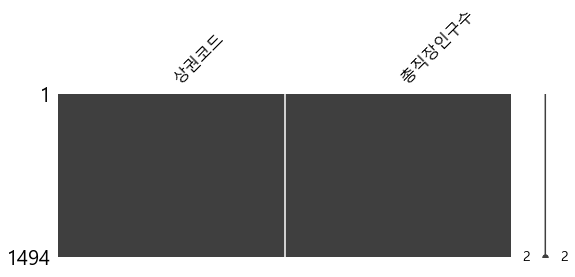

In [22]:
# 직장인구 데이터 결측치 확인 
missing(직장인구)

## 유동인구 

In [23]:
#유동인구
유동인구=유동인구.loc[:,['상권코드','연령대10유동인구수','연령대20유동인구수','연령대30유동인구수','연령대40유동인구수','연령대50유동인구수','연령대60이상유동인구수']]
유동인구=유동인구.groupby(['상권코드'],as_index=False).mean()
유동인구.head(5)
 

,상권코드,연령대10유동인구수,연령대20유동인구수,연령대30유동인구수,연령대40유동인구수,연령대60이상유동인구수
0,1000001,8780.111111,25388.722222,35452.888889,31010.722222,12735.333333
1,1000002,7399.888889,33461.388889,41541.444444,40204.222222,40511.833333
2,1000003,1920.500000,23440.611111,23943.777778,22074.833333,14998.055556
3,1000004,30163.277778,125694.000000,24149.611111,21028.944444,10618.277778
4,1000005,555.222222,5400.888889,2987.444444,3471.000000,1910.555556


## 상주인구 

In [24]:
#상주인구
상주인구=상주인구.loc[:,['상권코드','총상주인구수','연령대20상주인구수']]
상주인구=상주인구.groupby(['상권코드'],as_index=False).mean()
상주인구.head(5)

,상권코드,총상주인구수,연령대20상주인구수
0,1000001,1768.60,204.85
1,1000002,839.65,306.05
2,1000003,1157.00,159.25
3,1000004,1407.90,433.00
4,1000005,1711.90,241.35


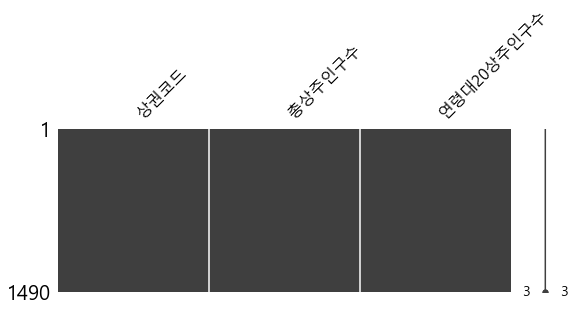

In [25]:
# 상주인구 데이터 결측치 확인 
missing(상주인구)

## 집객시설
- 집객시설 데이터셋에서 집객시설이 존재하지 않는 경우 결측치로 처리되어 0으로 대체해주었습니다.
- 학교와 병원은 시설수가 많지않아 기관으로 묶어주었습니다.

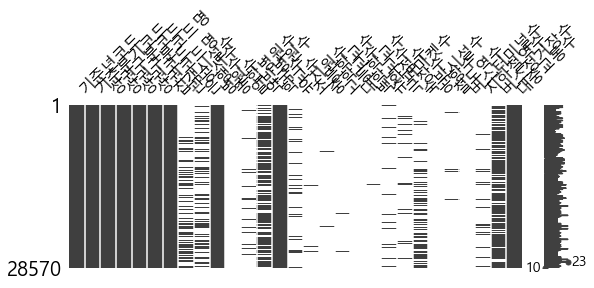

In [26]:
# 집객시설 데이터 결측치 확인 
missing(집객시설)

In [27]:
# 각각 집객시설이 없는경우 nan값 부여되어있으므로 0으로 결측치를 채워줌
# 결측치 제거 후 확인 
집객시설=집객시설.fillna(0)
집객시설.isnull().sum().head(5)

기준년코드      0
기준분기코드     0
상권구분코드     0
상권구분코드명    0
상권코드       0
dtype: int64

In [28]:
#집객시설
집객시설['의료기관'] = 집객시설['종합병원수'] + 집객시설['일반병원수']
집객시설['교육기관'] = 집객시설['유치원수'] + 집객시설['초등학교수'] + 집객시설['중학교수'] + 집객시설['고등학교수'] 
집객시설=집객시설.loc[:,['상권코드','극장수','버스터미널수','버스정거장수','지하철역수','숙박시설수','의료기관','교육기관','대학교수']]
집객시설=집객시설.groupby(['상권코드'],as_index=False).mean()
집객시설.head(5)

,상권코드,극장수,버스터미널수,버스정거장수,지하철역수,숙박시설수,의료기관,교육기관,대학교수
0,1000001,12.7,0.0,7.6,0.0,21.2,0.0,0.0,0.0
1,1000002,0.4,0.0,1.0,0.0,2.4,0.0,0.0,0.0
2,1000003,1.8,0.0,4.3,0.0,9.6,0.0,3.0,0.2
3,1000004,0.0,0.0,8.0,0.0,0.4,0.0,0.0,0.0
4,1000005,0.8,0.0,3.9,0.0,0.8,0.0,0.0,0.0


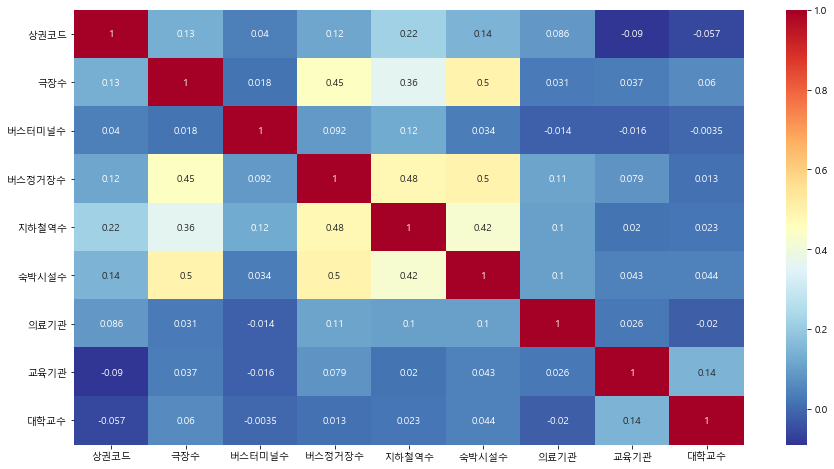

In [29]:
# 다중공선성 확인 
plt.figure(figsize=(15,8))
corrmat=sns.heatmap(집객시설.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

## 술집

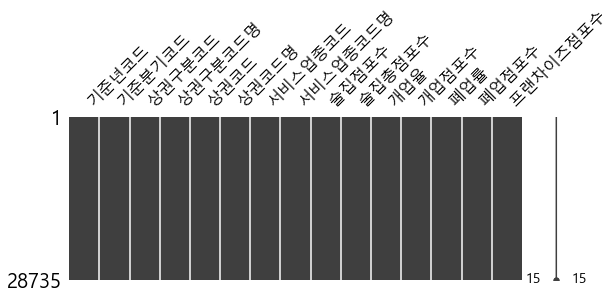

In [30]:
# 술집 데이터 결측치 확인 
missing(술집)

In [31]:
#술집
술집=술집.loc[:,['상권코드','술집점포수']]
술집=술집.groupby(['상권코드'],as_index=False).mean()

## 모든 데이터파일 총 병합

In [32]:
#모든 데이터파일 병합
from functools import reduce
df_list = [시군구상권코드,집객시설,유동인구,직장인구,편의점매출,상주인구,술집,편의점수] 
최종편의점 = reduce(lambda left, right: pd.merge(left, right, on=[ '상권코드']), df_list) 

## 시군구별 EDA
- 서울 내 시군구는 25구역이 존재
- 서울 내 시군구 도로명은 강남이 월등히 많으며 그 다음은 관악구, 서초구, 마포구 순이며 하위로는 서대문구, 도봉구, 노원구가 존재
- 매출액과 도로명별 점포가 많을수록 높아지기 때문에 합이 아닌 평균으로 계산

In [33]:
print('서울에 행정구역(시군구): ' + str(len(최종편의점['시군구명'].unique())))

서울에 행정구역(시군구): 25


<AxesSubplot:ylabel='시군구명'>

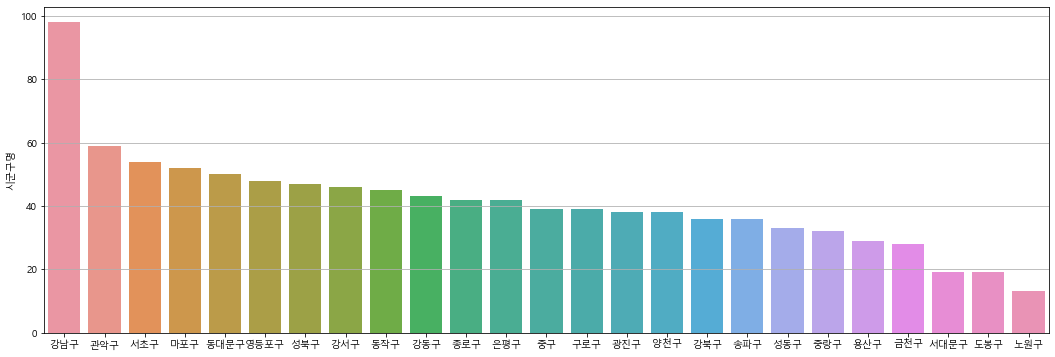

In [34]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x=최종편의점['시군구명'].value_counts().index,y=최종편의점['시군구명'].value_counts())

In [35]:
시군구=최종편의점.loc[:,['시군구명', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수',
       '의료기관', '교육기관', '대학교수', '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수',
       '연령대40유동인구수', '연령대60이상유동인구수', '총직장인구수', '점포별월매출금액', '총상주인구수',
       '연령대20상주인구수', '술집점포수', '총편의점점포수', '일반편의점점포수', '프랜차이즈점포수']].groupby(['시군구명'],as_index=False).sum()
시군구2=최종편의점.loc[:,['시군구명','점포별월매출금액','생존률']].groupby(['시군구명'],as_index=True).mean()

<AxesSubplot:ylabel='시군구명'>

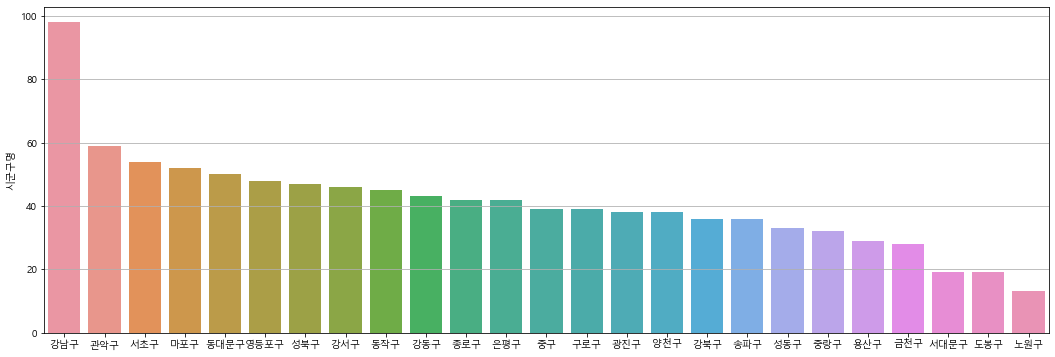

In [36]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x=최종편의점['시군구명'].value_counts().index,y=최종편의점['시군구명'].value_counts())

In [37]:
시군구=시군구.set_index('시군구명')

## 각 컬럼(Columns)별 데이터 탐색적 분석(EDA)
- 집객시설과 인구 그리고 편의점고유 정보로 나눔
- 시각화 함수 생성

In [38]:
faciltiy=시군구.loc[:,['극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '의료기관', '교육기관', '대학교수',
'술집점포수', '총편의점점포수','일반편의점점포수', '프랜차이즈점포수']]
population =시군구.loc[:,['연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수',
       '총직장인구수', '총상주인구수', '연령대20상주인구수']]
sales=시군구2.loc[:,['점포별월매출금액','생존률']]

In [39]:
list_faciltiy=['극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '의료기관', '교육기관', '대학교수',
'술집점포수', '총편의점점포수','일반편의점점포수', '프랜차이즈점포수']
list_population=['연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수',
       '총직장인구수', '총상주인구수', '연령대20상주인구수']
list_sales=['점포별월매출금액','생존률']

In [40]:
# 바 그래프 함수설정 
def bargrape(df,list,x,y):
    plt.figure(figsize=(130,80))
    sns.set(font_scale=3.5) 
    plt.rc('font',family='Malgun Gothic')
    for i in range(len(df.columns)):
        plt.subplot(x,y,i+1)
        sns.barplot(x=df[[list[i]]].sort_values(by=list[i],ascending=False)[list[i]].index,y=df[[list[i]]].sort_values(by=list[i],ascending=False)[list[i]])

## 시군구별 집객시설 수 
-  극장, 버스터미널 그리고 대학교 시설 수는 시군구별 상당한 차이를 보이고 있으며 시설이 아예 없는 시군구별( (ex) 버스터미널, 대학교 )도 존재합니다. 
-  버스정거장, 교육기관, 술집 시설 수는 대체적으로 모든 시군구별 비슷하게 분포되어 있습니다. 

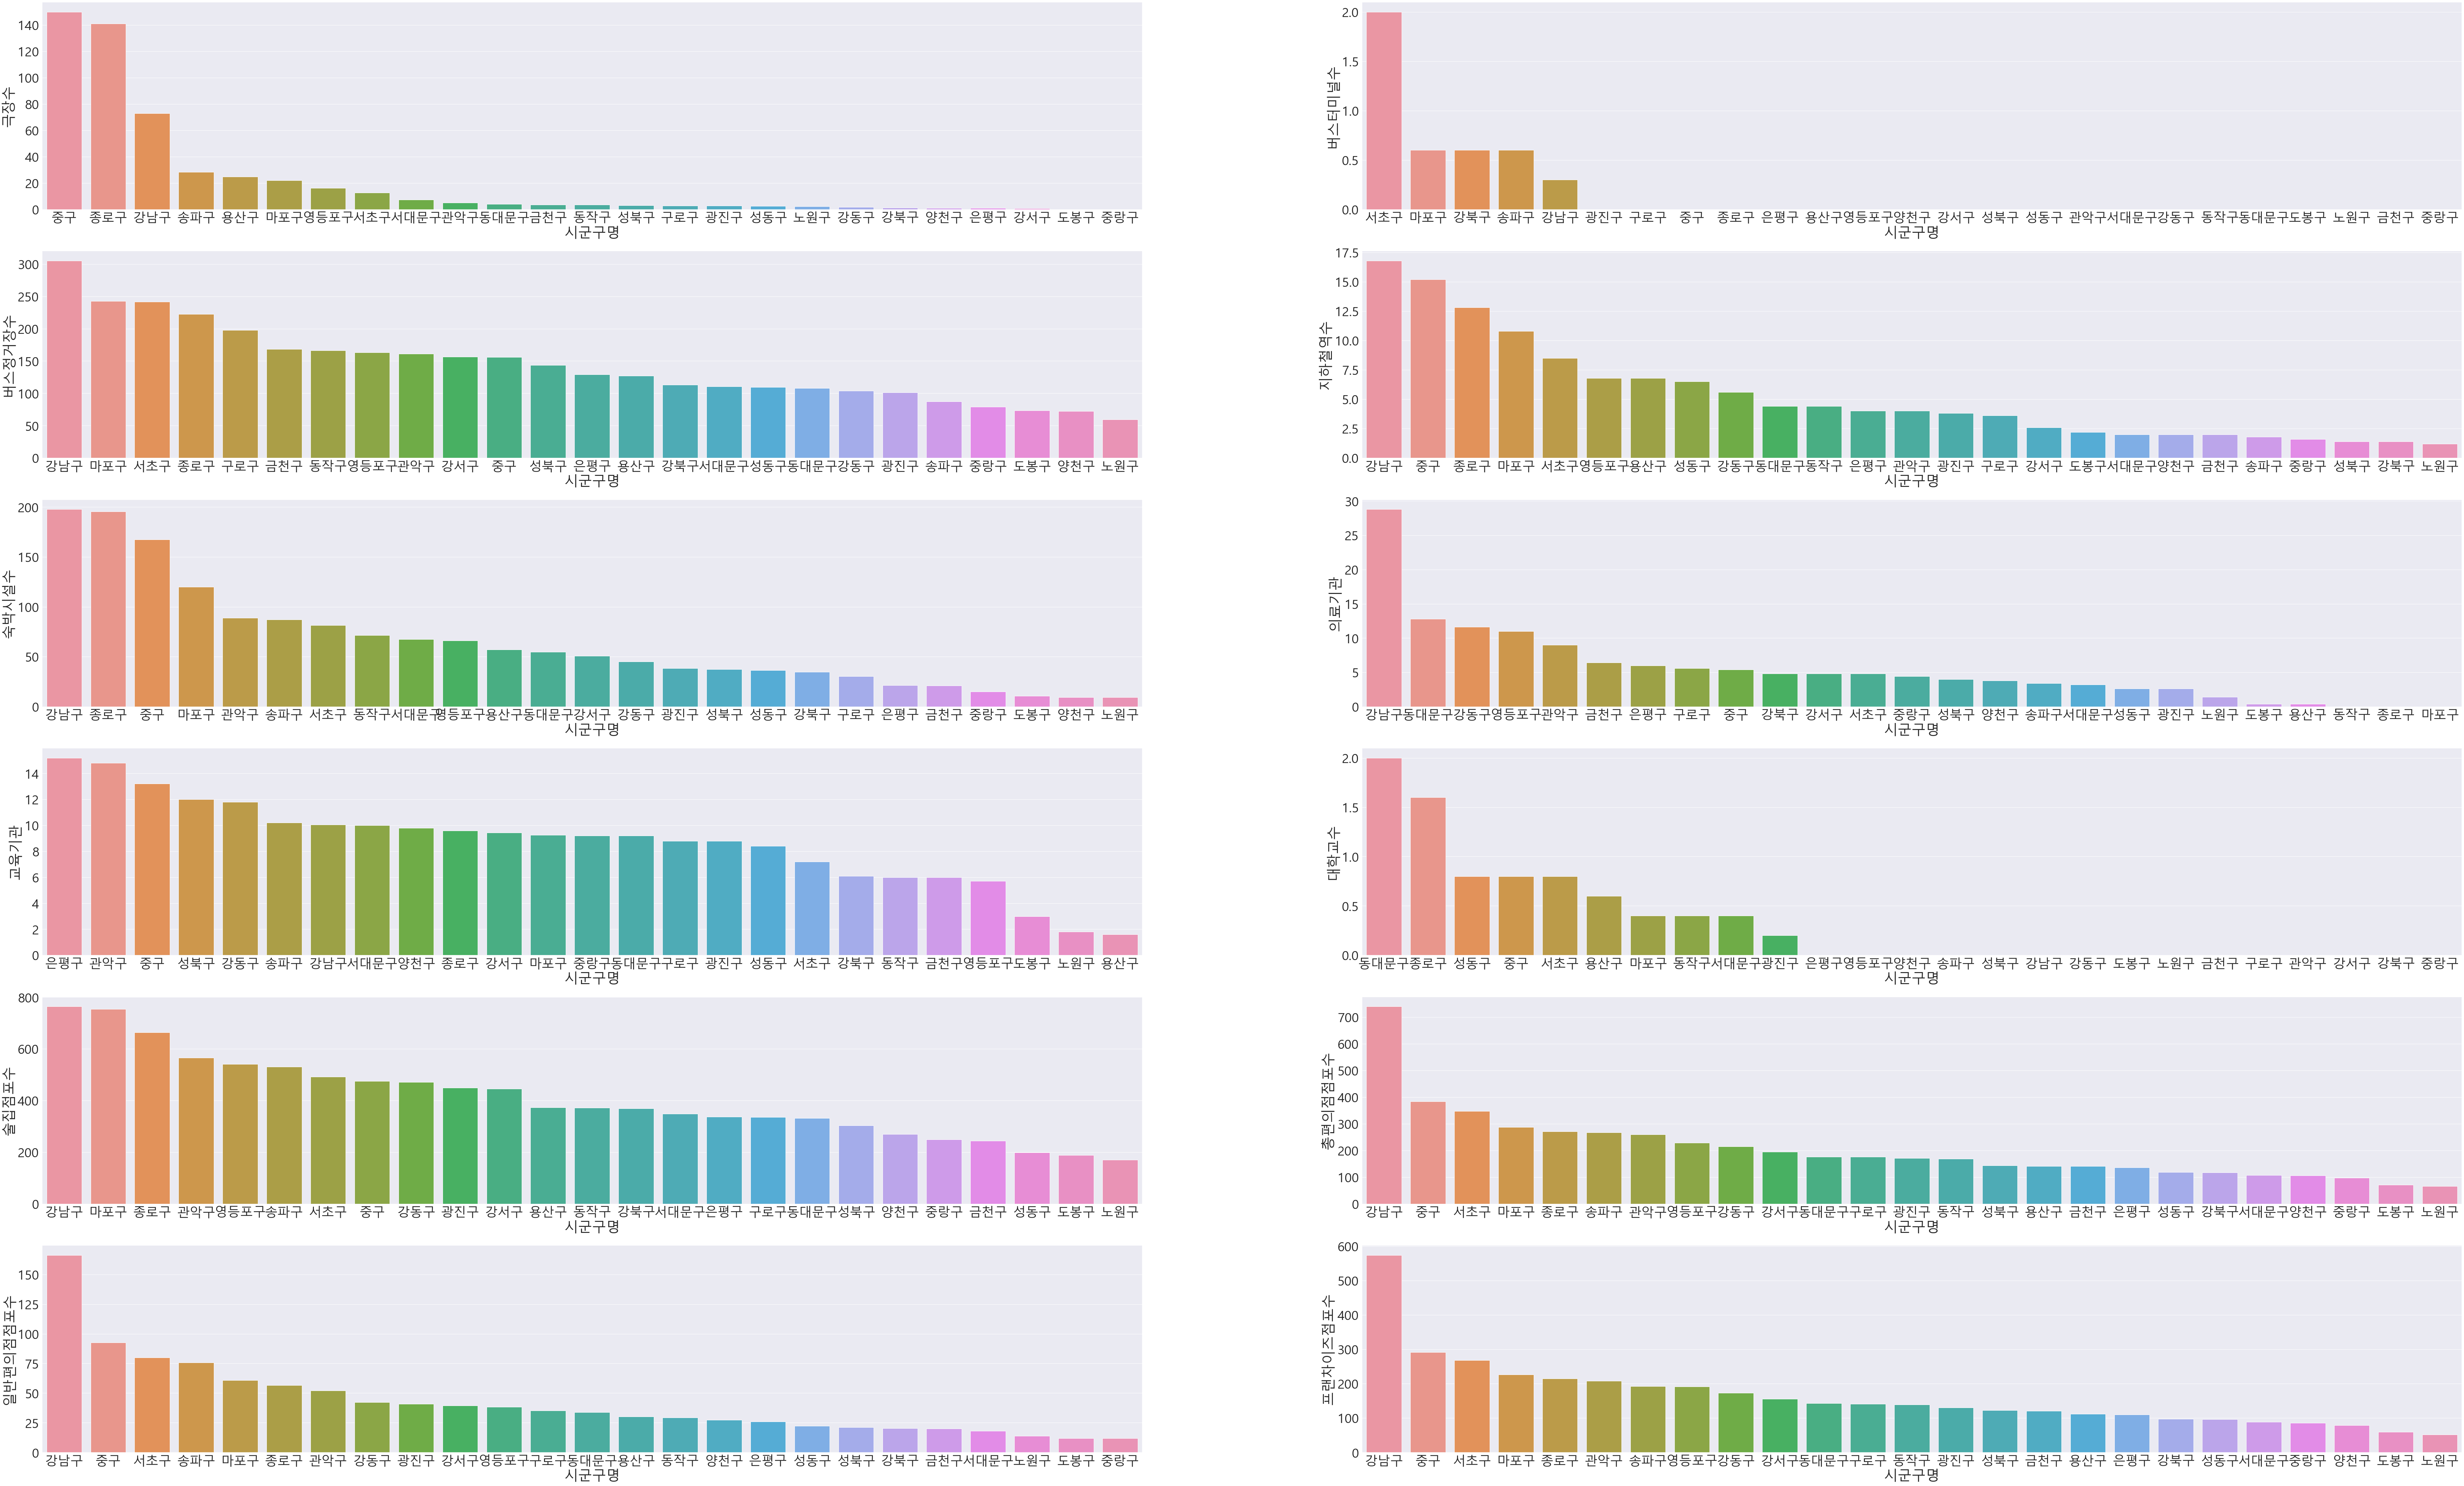

In [41]:
bargrape(faciltiy,list_faciltiy,6,2)

## 시군구별 유동인구

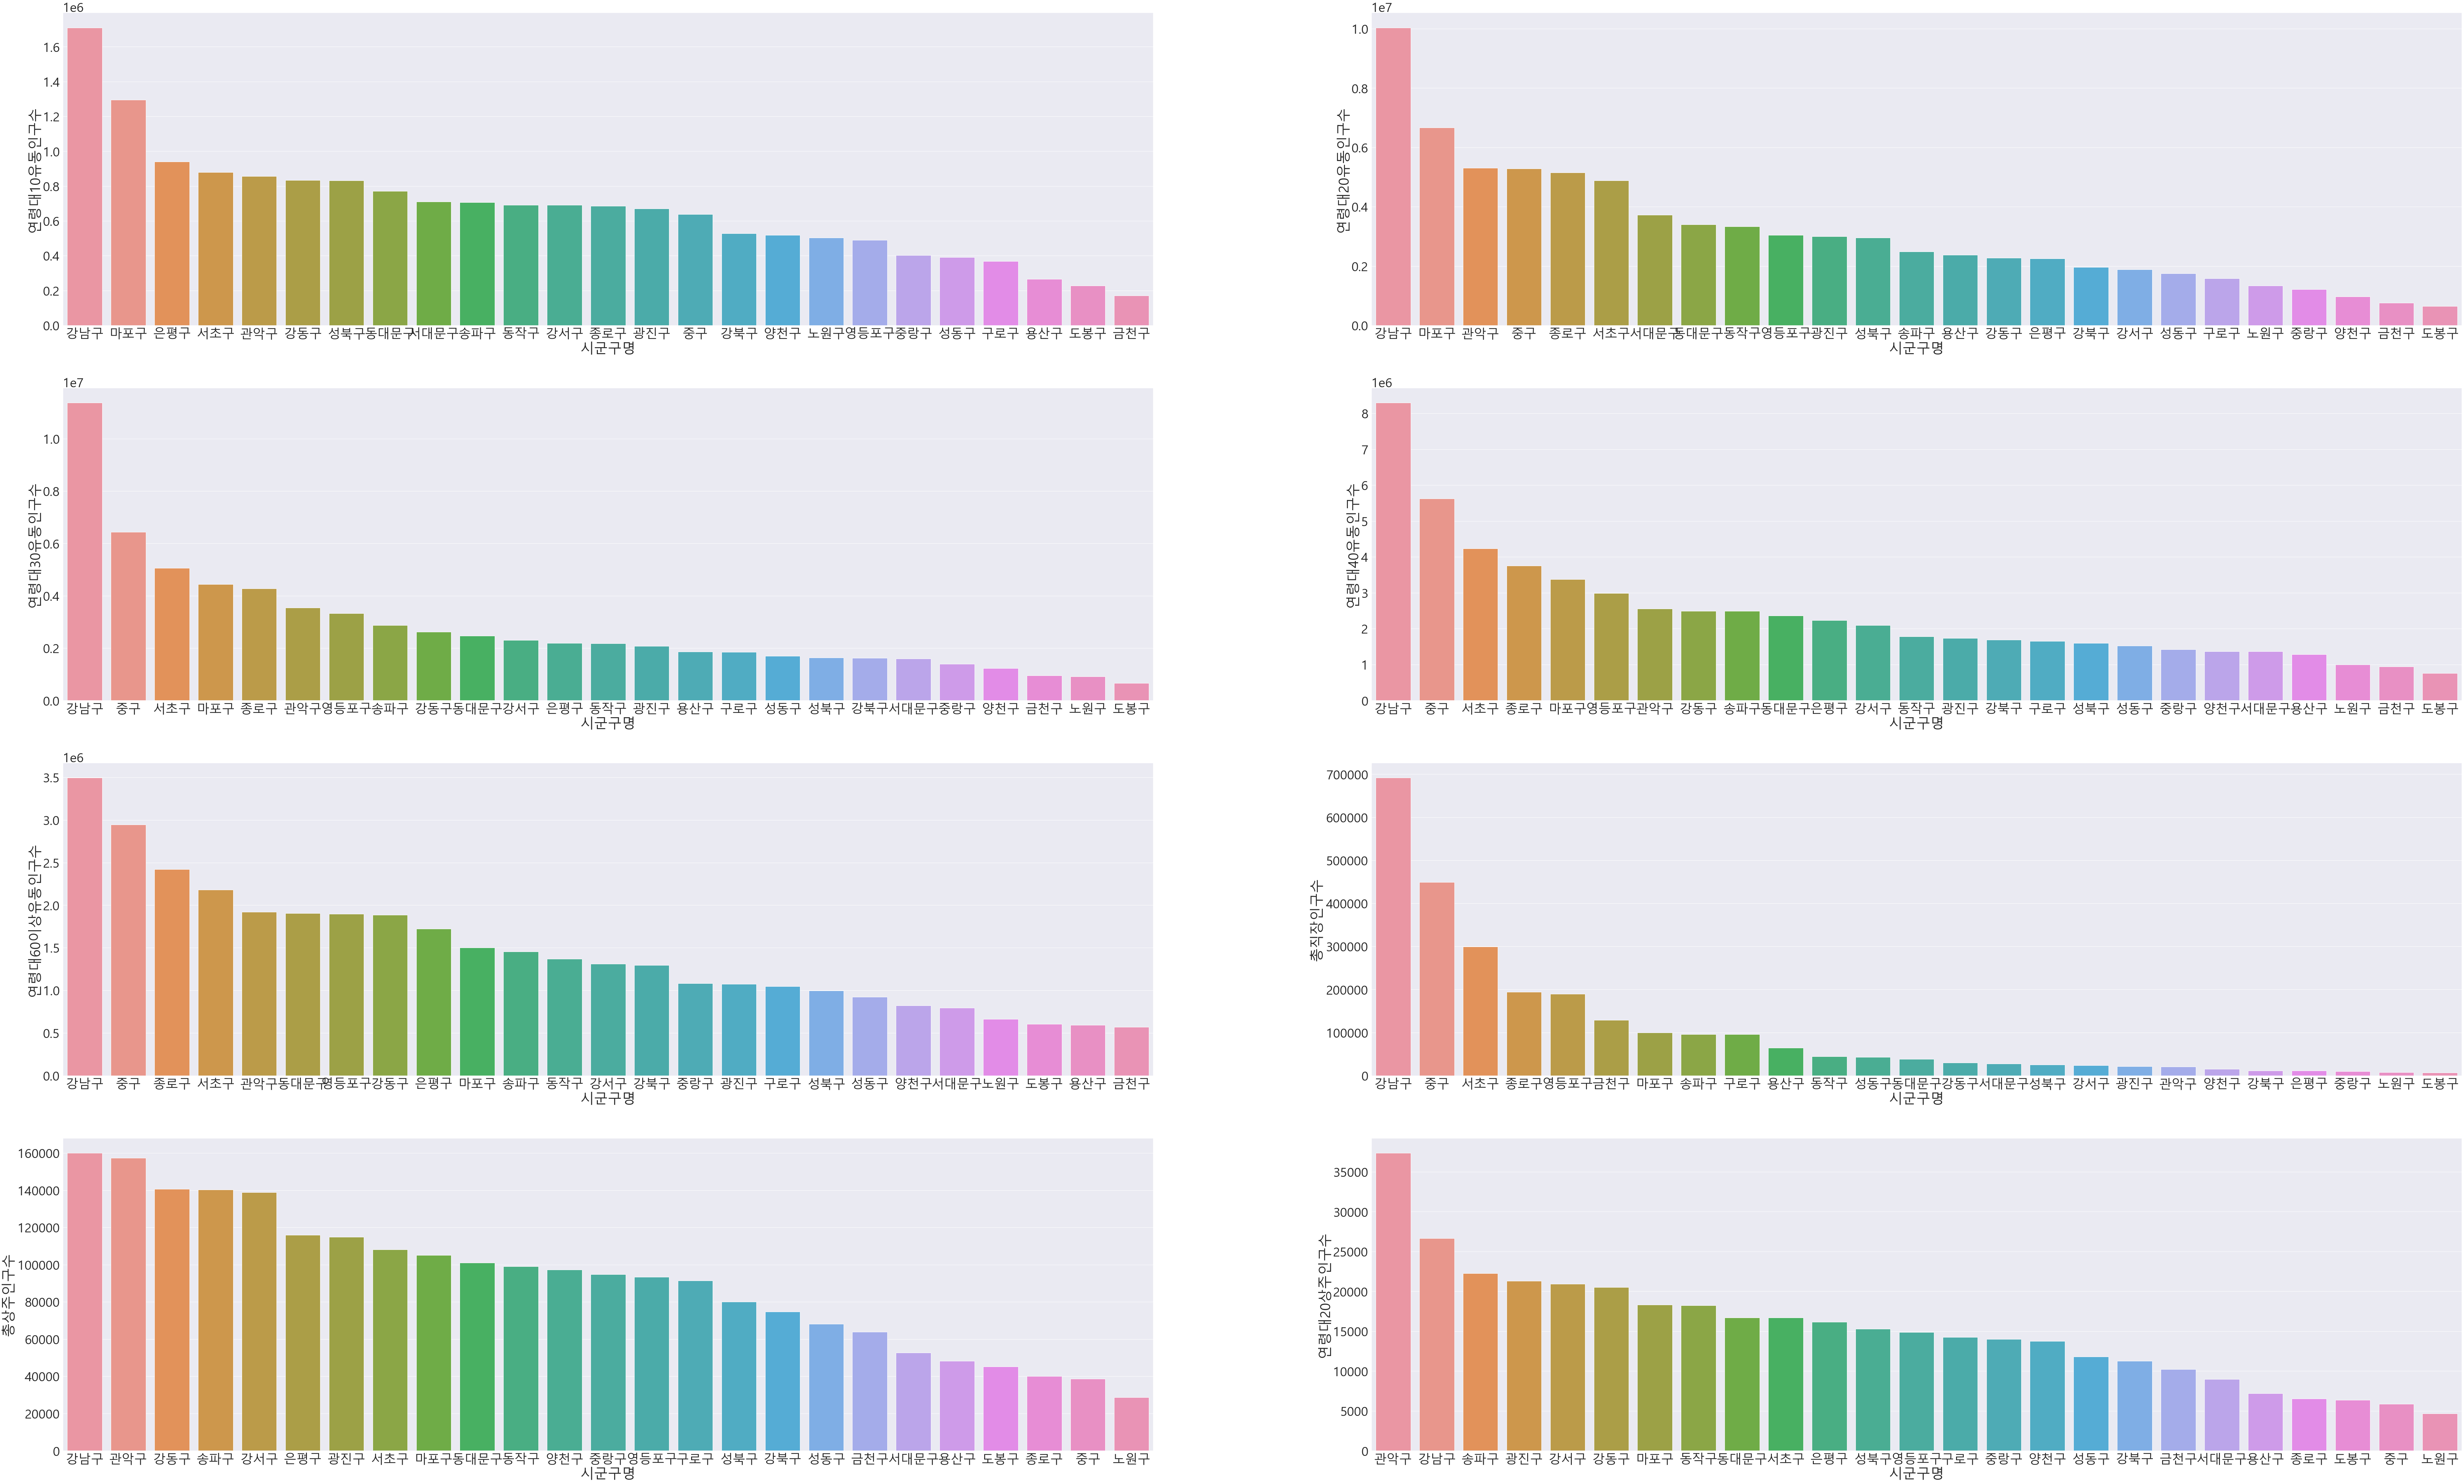

In [42]:
bargrape(population,list_population,4,2)

## 시군구 별 월매출액 그리고 생존률
- 서울 행정구역(시군구)별 점포별월매출금액과 생존률은 정비례하지 않습니다.
- 서울 행정구역(시군구)별 생존률은 큰 격차는 없습니다. 

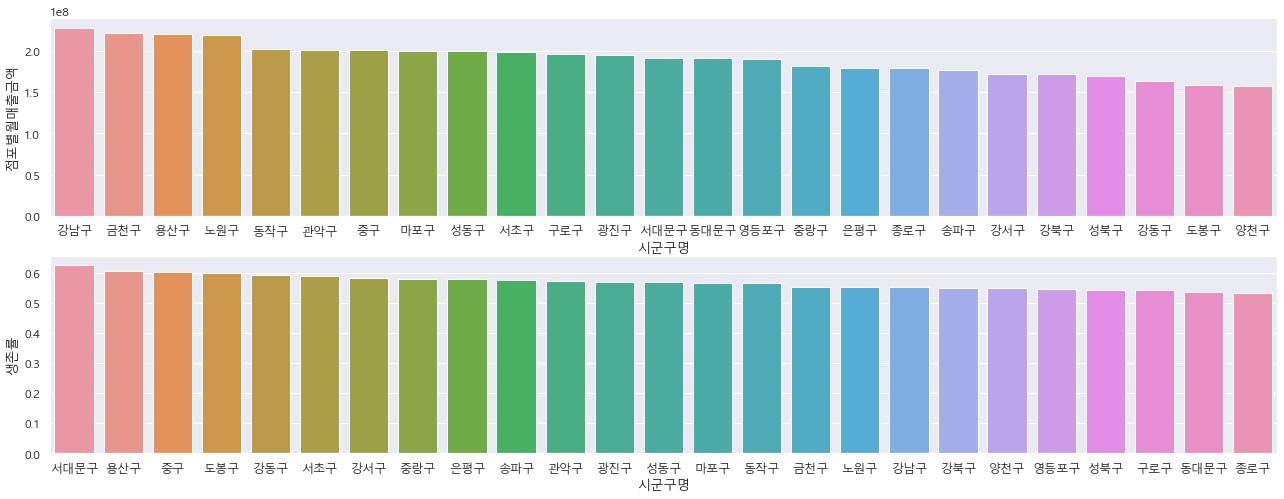

In [43]:
plt.figure(figsize=(22,8))
sns.set(font_scale=1.1) 
plt.rc('font',family='Malgun Gothic')
for i in range(len(list_sales)):
    plt.subplot(2,1,i+1)
    sns.barplot(x=sales[[list_sales[i]]].sort_values(by=list_sales[i],ascending=False)[list_sales[i]].index,y=sales[[list_sales[i]]].sort_values(by=list_sales[i],ascending=False)[list_sales[i]])

In [44]:
# 최종데이터파일 저장
# 최종편의점.to_csv("c:/data/project/team/revised/최종데이터파일.csv",encoding='cp949')

## 클러스터링

In [45]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
from sklearn.cluster import AgglomerativeClustering

In [46]:
클러스터링=최종편의점.loc[:,['상권코드','총편의점점포수','점포별월매출금액']]
클러스터링=클러스터링.groupby(['상권코드'],as_index=False).sum().set_index(['상권코드'])


## 매출을 기준으로 3개의 군집으로 나눔
- 매출이 높은 상권들은 상대적으로 많지 않다는 것은 알 수 있습니다.
- 매출이 중간 또는 매출이 낮은 상권들이 주요(일반적으로 투자되는) 상권이라고 파악했습니다.

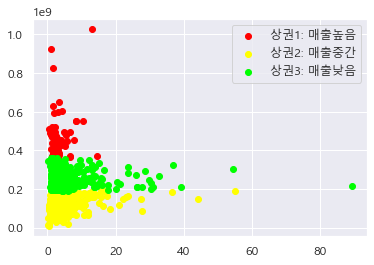

In [47]:
x,y=make_blobs(random_state=1) #랜덤 데이터셋
#계층적 군집화 n_clusters 군집 개수 
# agg=AgglomerativeClustering(n_clusters=3)
model=KMeans(n_clusters=3)
model=model.fit_predict(클러스터링)  #학습 및 군집을 나눔 
# print(assign)
# print(assign.shape)
a=model.reshape(-1,1) #2차원 형태로 변환
#print(a.shape)
x1=np.hstack([클러스터링,a]) #x 배열에 추가
#print(x1)
x_0=x1[x1[:,2]==0,:] # 군집 0
x_1=x1[x1[:,2]==1,:] # 군집 1 
x_2=x1[x1[:,2]==2,:] # 군집 2 

# 시각화
plt.scatter(x_1[:,0], x_1[:,1], c='red')
plt.scatter(x_2[:,0], x_2[:,1], c='yellow')
plt.scatter(x_0[:,0], x_0[:,1], c='lime')
plt.legend(['상권1: 매출높음', '상권2: 매출중간', '상권3: 매출낮음'], loc=1)
plt.show()

In [48]:
cluster=pd.DataFrame(model,columns=['분류'])
클러스터링=클러스터링.reset_index()

In [49]:
클러스터링=pd.concat([클러스터링,cluster],axis=1)

In [50]:
클러스터링.head(5)

,상권코드,총편의점점포수,점포별월매출금액,분류
0,1000001,3.400000,2.068619e+08,0
1,1000002,3.850000,2.055070e+08,0
2,1000003,6.400000,1.488270e+08,2
3,1000004,4.450000,2.887345e+08,0
4,1000005,2.142857,7.954911e+07,2


In [51]:
## CSV로 저장 
#클러스터링.to_csv("c:/data/project/team/revised/클러스터링1.csv",encoding='cp949')

In [52]:
# 필요데이터셋 불러오기
클러스터링=클러스터링.reset_index()
상권코드명=pd.read_csv("c:/data/project/team/raw/상권코드명.csv",encoding='cp949')

In [53]:
클러스터링

,index,상권코드,총편의점점포수,점포별월매출금액,분류
0,0,1000001,3.400000,2.068619e+08,0
1,1,1000002,3.850000,2.055070e+08,0
2,2,1000003,6.400000,1.488270e+08,2
3,3,1000004,4.450000,2.887345e+08,0
4,4,1000005,2.142857,7.954911e+07,2
...,...,...,...,...,...
1020,1020,1001492,89.300000,2.141036e+08,0
1021,1021,1001493,39.100000,2.081689e+08,0
1022,1022,1001494,44.050000,1.480367e+08,2
1023,1023,1001495,54.950000,1.873726e+08,2


In [54]:
상권코드명확인=pd.merge(클러스터링,상권코드명)


In [55]:
상권코드명확인['분류'].value_counts()

2    616
0    343
1     66
Name: 분류, dtype: int64

In [56]:
# 상권별로 데이터셋 나누기
매출이낮은상권=상권코드명확인[상권코드명확인['분류']==0]
매출이높은상권=상권코드명확인[상권코드명확인['분류']==1]
매출이중간인상권=상권코드명확인[상권코드명확인['분류']==2]

## 상권별 최소금액과 최대금액 구간화 및 상권개수 

In [57]:
print("매출이 낮은 상권(매출액 구간): "+str(+매출이낮은상권['점포별월매출금액'].min())+"에서"+str(매출이낮은상권['점포별월매출금액'].max())+"\n매출이 낮은 상권(상권개수):    "+str(len(매출이낮은상권))+"개 상권\n")
print("매출이 중간인 상권(매출액 구간): "+str(매출이중간인상권['점포별월매출금액'].min())+"에서"+str(매출이중간인상권['점포별월매출금액'].max())+"\n매출이 중간인 상권(상권개수):    "+str(len(매출이중간인상권))+"개 상권\n")
print("매출이 높은 상권(매출액 구간): "+str(매출이높은상권['점포별월매출금액'].min())+"에서"+str(매출이높은상권['점포별월매출금액'].max())+"\n매출이 높은 상권(상권개수):    "+str(len(매출이높은상권))+"개 상권")

매출이 낮은 상권(매출액 구간): 191087879.58499998에서361154374.9
매출이 낮은 상권(상권개수):    343개 상권

매출이 중간인 상권(매출액 구간): 5991840.25에서190479813.8285
매출이 중간인 상권(상권개수):    616개 상권

매출이 높은 상권(매출액 구간): 363624885.69에서1029480596.3950001
매출이 높은 상권(상권개수):    66개 상권


## 상권별 도로명 파악

In [64]:
매출이높은상권['상권코드명'].unique()

array(['이화장길', '동호로11길', '한강대로43길', '한강대로88길', '둘레9길', '매봉길', '성덕정17길',
       '긴고랑로7길', '자양로11길', '답십리로64길', '답십리로68길', '천장산로7길', '동일로139가길',
       '용마산로112길', '돌곶이로27길', '정릉로8길', '응암로13길', '홍제내길', '양화로11길',
       '와우산로29길', '와우산로3길', '곰달래로3길', '남부순환로58길', '강서로29길', '우마길',
       '금하로14길', '독산로40길', '대림로29길', '디지털로37길', '사당로8길', '관악로30길', '서림7길',
       '신림로65길', '압구정로2길', '일원로3길', '테헤란로81길', '송파대로30길', '고덕로10길',
       '진황도로47길', '서울 관악구 신림역_1', '문정역', '뱅뱅사거리_1', '역삼역_1', '대림역_1',
       '역삼역_2', '고속터미널역', '선정릉역_1', '코엑스', '서울 강남구 학동역_2', '학동역',
       '서울 동작구 노량진1동_1', '도산공원사거리_1', '학동사거리_2', '한남오거리', '서울 강동구 천호역_1',
       '서울 광진구 건대입구역_1', '서울 광진구 건대입구역_2', '왕십리역_2', '서울 중구 신당역_1',
       '롯데백화점', '서울 종로구 경복궁역_1', '서울 노원구 노원역_3', '독산동 우시장', '노량진중앙시장',
       '풍납시장', '강남 마이스 관광특구'], dtype=object)

In [67]:
매출이중간인상권['상권코드명'].unique()

array(['돈화문로11가길', '백석동길', '성균관로5길', '옥인길', '종로24길', '종로65길', '지봉로8길',
       '창경궁로35길', '통일로12길', '평창길', '난계로21길', '다산로33길', '다산로36길', '다산로38길',
       '다산로39길', '명동길', '삼일대로4길', '청구로17길', '퇴계로46길', '두텁바위로1길', '백범로79길',
       '백범로90길', '소월로20길', '우사단로4길', '원효로41길', '청파로73길', '한강대로104길',
       '한강대로52길', '효창원로39길', '고산자로6길', '금호산2길', '마조로1길', '무수막길', '무학봉28길',
       '무학봉길', '사근동길', '상원12길', '서울숲2길', '성수이로7길', '성수일로6길', '송정4가길',
       '아차산로11길', '왕십리로26길', '왕십리로6길', '용답29길', '장터길', '한림말3길', '한림말길',
       '광나루로24길', '광나루로40길', '광나루로52길', '긴고랑로20길', '능동로19길', '능동로34길',
       '능동로3길', '동일로18길', '뚝섬로48길', '뚝섬로54길', '뚝섬로58길', '면목로17길',
       '아차산로40길', '아차산로65길', '아차산로78길', '용마산로21길', '용마산로3길', '자양로26길',
       '자양로45길', '자양로50길', '천호대로109길', '천호대로123길', '천호대로129길', '경희대로4길',
       '답십리로56길', '답십리로60길', '답십리로69길', '망우로18가길', '망우로21길', '무학로45길',
       '사가정로23가길', '서울시립대로16길', '서울시립대로4길', '약령시로17길', '왕산로32길', '장한로25길',
       '장한로26가길', '장한로8길', '전농로29길', '전농로3길', '천호대로17길', '천호대로97길'

In [70]:
매출이낮은상권['상권코드명'].unique()


array(['계동길', '난계로27길', '명륜길', '북촌로5길', '율곡로16길', '종로58가길', '난계로11길',
       '동호로10길', '동호로8길', '퇴계로90길', '녹사평대로26길', '녹사평대로46길', '원효로19길',
       '이촌로22길', '이태원로27길', '청파로47길', '한강대로62길', '회나무로13길', '금호산길',
       '뚝섬로5길', '상원길', '왕십리로14길', '왕십리로21길', '왕십리로31길', '광나루로12길',
       '광나루로36길', '긴고랑로9길', '능동로13길', '아차산로51길', '아차산로55길', '자양로53길',
       '경희대로3길', '답십리로23길', '무학로16길', '사가정로13길', '서울시립대로29길', '왕산로43길',
       '이문로42길', '장한로14길', '장한로26길', '장한로5길', '제기로21길', '제기로5길', '한천로46길',
       '휘경로2길', '겸재로29길', '겸재로54길', '공릉로2길', '동일로112길', '동일로123길',
       '동일로157길', '망우로68길', '봉우재로33길', '사가정로54길', '삼선교로10길', '성북로8길',
       '안암로5길', '인촌로17가길', '인촌로1길', '개운사길', '인촌로5길', '장위로50길', '종암로5길',
       '덕릉로41길', '도봉로45길', '수유로12길', '한천로124나길', '한천로139가길', '도당로29길',
       '도봉로114길', '도봉로181길', '우이천로32길', '공릉로58길', '동일로242길', '상계로12길',
       '석계로1길', '가좌로7길', '갈현로1길', '불광천길', '연서로16길', '연서로28길', '은평로8길',
       '응암로22길', '증산로15길', '증산로21길', '증산로5길', '가재울로6길', '모래내로15길', '세무서길',
       '충정로